In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("/content/fake_reg.csv")

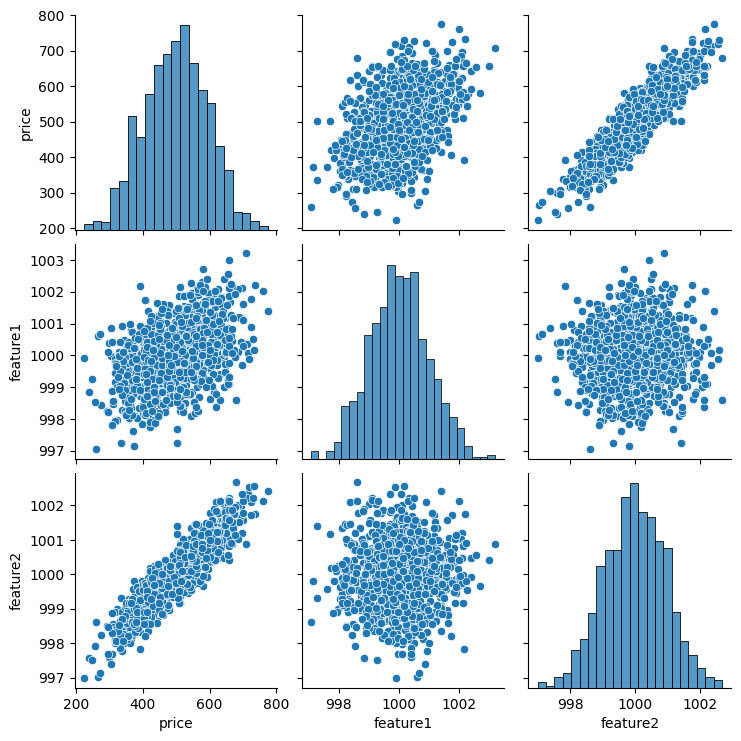

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df[['feature1','feature2']].values

In [7]:
y = df['price'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(670, 2)

In [10]:
X_test.shape

(330, 2)

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(X_train)

MinMaxScaler()

In [14]:
X_train=scaler.transform(X_train)

In [15]:
X_test=scaler.transform(X_test)

### Keras Part 2

In [17]:
!pip install tensorflow

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential([Dense(4,activation='relu'),
                    Dense(2,activation='relu'),
                    Dense(1)
                    ])

In [20]:
# another way is
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

In [21]:
from re import VERBOSE
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 255399.4688
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 256470.2500 
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 250901.6406 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 257473.8906 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 254757.9688 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 252677.6094 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253408.6875 
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 251650.9219 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 254382.1250 
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 260859.2031 
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 250498.0156 
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 258354.4062 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 253230.8594 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2

In [23]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

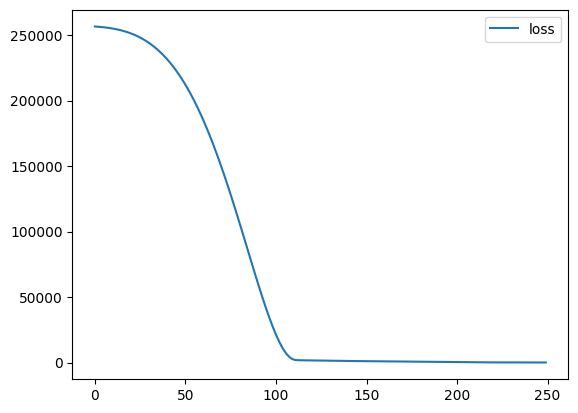

In [24]:
loss_df.plot()

### keras part 3 (evaluation)

In [25]:
model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28.5132  


26.55866813659668

In [26]:
model.evaluate(X_train,y_train)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.5561


26.221878051757812

In [38]:
test_predictions = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [39]:
test_predictions = pd.Series(test_predictions.reshape(330,))

In [40]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [41]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [42]:
pred_df.columns = ['Test Y','Model Predictions']

In [43]:
pred_df

,Test Y,Model Predictions
0,402.296319,407.260223
1,624.156198,622.627258
2,582.455066,591.391846
3,578.588606,572.545044
4,371.224104,370.156769
...,...,...
325,535.543676,535.731812
326,425.843651,434.289581
327,368.920095,372.560547
328,505.631884,500.340118


<Axes: xlabel='Test Y', ylabel='Model Predictions'>

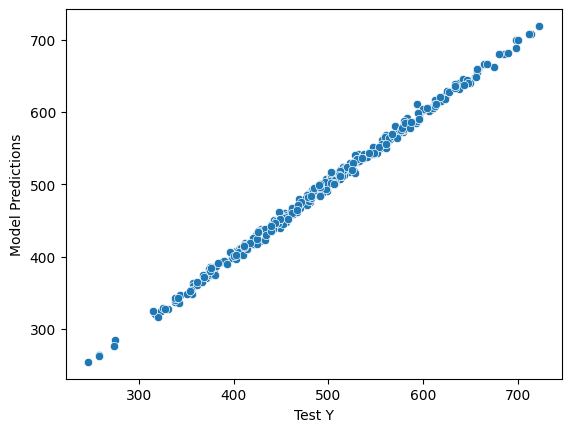

In [44]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [46]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.186262082134338

In [48]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

5.1535108140953145

In [49]:
new_gem = [[998,1000]]

In [50]:
new_gem=scaler.transform(new_gem)

In [51]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[422.45105]], dtype=float32)

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save('my_gen_model.h5')